## **Load bioactivity data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')

## **Calculate Lipinski descriptors**
The Lipinski's Rule stated the following: (for evaluation of druglikeness of the compound)
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [53]:
! pip install seaborn
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error

### **Calculate descriptors**

Here we can generate various descriptors like molecular weight, polar surface area, LogP, number of hydrogen bond donors, number of hydrogen bond acceptors, number of aromatic rings, rotatable bonds etc. Here, for our analysis we have chosen MW, LogP, HBA and HBD as these are the four parameters in the Lipinski rule of five to determine the druglikeness of the compounds.

In [5]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [6]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

In [7]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


In [8]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive


In [9]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [10]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,278.307,3.29102,0.0,3.0


### **Convert IC50 to pIC50 (Normalization of Bioactivity values)**

In [11]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [12]:
df_combined.standard_value.describe()

count    1.330000e+02
mean     8.017926e+12
std      3.344888e+13
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      3.311311e+14
Name: standard_value, dtype: float64

In [13]:
-np.log10( (10**-9)* 100000000 )

1.0

In [14]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [15]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [16]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,10700.0


In [17]:
df_norm.standard_value_norm.describe()

count    1.330000e+02
mean     2.110164e+07
std      4.089714e+07
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [18]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [19]:
df_final.pIC50.describe()

count    133.000000
mean       4.060148
std        1.783762
min        1.000000
25%        3.522879
50%        4.628932
75%        4.970616
max        7.301030
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**

In [20]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [22]:
#saving data that will be needed for data visualization to a csv file
finaldf=df_2class[['bioactivity_class','MW','LogP','NumHDonors','NumHAcceptors','pIC50']]
finaldf.to_csv('dataforvisualization.csv', index=False)

# Regression Models

## Splitting into train and test datasets

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df_2class[['MW','LogP','NumHDonors','NumHAcceptors']],  df_2class['pIC50'],test_size=0.30, random_state=5)
print(f'train: {x_train.size}')
print(f'test: {x_test.size}')

train: 332
test: 144


In [24]:
#verifying that the feature matrix is of the right shape
x_test.shape

(36, 4)

## Linear Regression

In [30]:
regr_1=linear_model.LinearRegression()
regr_1.fit(x_train,y_train)
y_pred1=regr_1.predict(x_test)
coeff=regr_1.coef_
constant=regr_1.intercept_
print(coeff)
print(regr_1.intercept_)

[ 0.00237455 -0.48871024 -1.00468675 -0.04161617]
6.280932979984838


In [54]:
print(r2_score(y_test,y_pred1))
print(mean_squared_error(y_test, y_pred1))

0.06171963951924675
3.3428798594152878


In [28]:
(x_test*coeff).head(5)

,MW,LogP,NumHDonors,NumHAcceptors
77,1.210938,-2.936464,-1.004687,-0.291313
65,1.031686,-1.790087,-2.009373,-0.332929
45,0.793946,-1.191495,-2.009373,-0.291313
14,0.781551,-1.280714,-0.000000,-0.083232
92,0.901112,-1.602090,-2.009373,-0.249697


In [126]:
sum((x_test*coeff).iloc[1]) #sum of values in row with index 1

-2.912415128597884

In [127]:
xvalues=0
xvalueslist=[]
for i in range(0,40):
    xvalues=sum((x_test*coeff).iloc[i])
    xvalueslist.append(xvalues)
len(xvalueslist)

40

Text(0, 0.5, 'pIC50')

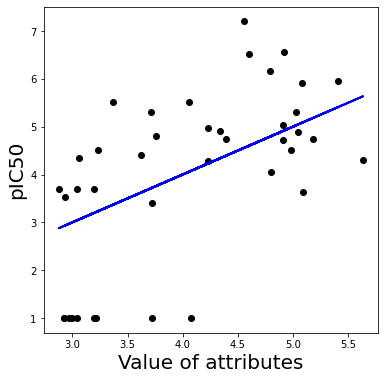

In [128]:
plt.figure(figsize=(6,6))
plt.scatter(xvalueslist+constant,y_test,color='black')
plt.plot(xvalueslist+constant,y_pred1,color='blue', linewidth=2)
plt.xlabel('Value of attributes',size=20)
plt.ylabel('pIC50',size=20)

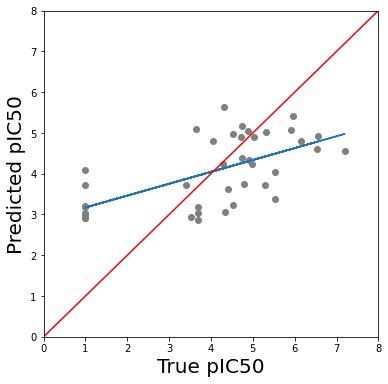

In [129]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred1,color='grey')
m, b = np.polyfit(y_test, y_pred1, 1)
plt.plot(y_test, m*(y_test) + b)
plt.plot(np.linspace(0,10),np.linspace(0,10),color='red')
plt.xlabel('True pIC50',size=20)
plt.ylabel('Predicted pIC50',size=20)
plt.xlim(0,8)
plt.ylim(0,8)
plt.show()
#Red line is the y=x line with angle = 45 degrees with x axis
#if the blue line is closer to the red line it indicates that the true values are quite close to the predicted values

## Decision Tree

In [64]:
regr_2=DecisionTreeRegressor(max_depth=1)
regr_2.fit(x_train,y_train)
y_pred2=regr_2.predict(x_test)

In [65]:
print(r2_score(y_test,y_pred2))
print(mean_squared_error(y_test, y_pred2))

0.11115793063917923
3.16674245461652


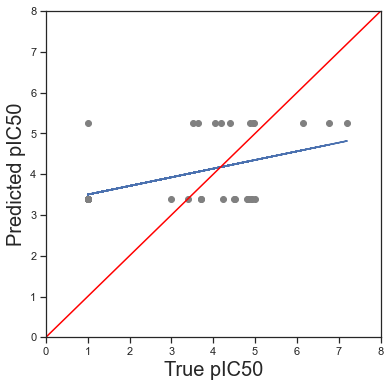

In [66]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred2,color='grey')
m, b = np.polyfit(y_test, y_pred2, 1)
plt.plot(y_test, m*(y_test) + b)
plt.plot(np.linspace(0,10),np.linspace(0,10),color='red')
plt.xlabel('True pIC50',size=20)
plt.ylabel('Predicted pIC50',size=20)
plt.xlim(0,8)
plt.ylim(0,8)
#plt.text(6,7,'y=',fontsize=15,color='red')
plt.show()

## Random Forest

In [58]:
regr_3=RandomForestRegressor(random_state=2)
regr_3.fit(x_train,y_train)
y_pred3=regr_2.predict(x_test)

In [59]:
print(r2_score(y_test,y_pred3))
print(mean_squared_error(y_test, y_pred3))

0.17524072100048582
2.9384300244978916


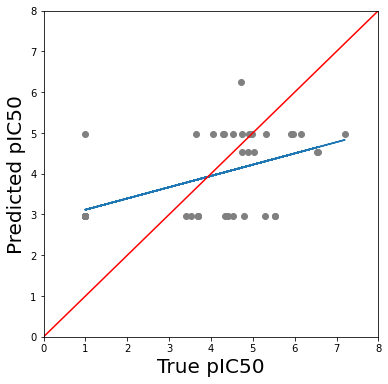

In [135]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred3,color='grey')
m, b = np.polyfit(y_test, y_pred3, 1)
plt.plot(y_test, m*(y_test) + b)
plt.plot(np.linspace(0,10),np.linspace(0,10),color='red')
plt.xlabel('True pIC50',size=20)
plt.ylabel('Predicted pIC50',size=20)
plt.xlim(0,8)
plt.ylim(0,8)
plt.show()

## Support Vector Machine

In [60]:
regr_4=svm.SVR()
regr_4.fit(x_train,y_train)
y_pred4=regr_4.predict(x_test)

In [61]:
print(r2_score(y_test,y_pred4))
print(mean_squared_error(y_test, y_pred4))

-0.17188064438723227
4.175144624953542


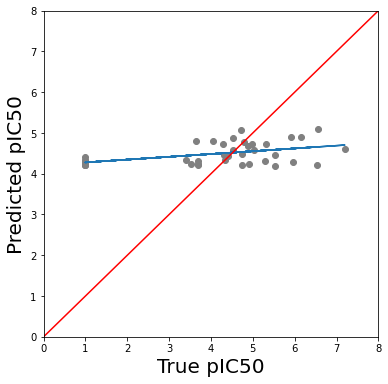

In [138]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred4,color='grey')
m, b = np.polyfit(y_test, y_pred4, 1)
plt.plot(y_test, m*(y_test) + b)
plt.plot(np.linspace(0,10),np.linspace(0,10),color='red')
plt.xlabel('True pIC50',size=20)
plt.ylabel('Predicted pIC50',size=20)
plt.xlim(0,8)
plt.ylim(0,8)
plt.show()

# Classification Models (as active or inactive compound)

## K Nearest Neighbour 

In [39]:
df_2class[['bioactivity_class','MW','LogP','NumHDonors','NumHAcceptors']]

,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
2,inactive,421.190,2.66050,0.0,4.0
3,inactive,293.347,3.63080,0.0,3.0
5,active,372.243,4.39330,0.0,3.0
7,active,419.243,4.23540,0.0,3.0
8,inactive,327.792,4.28420,0.0,3.0
...,...,...,...,...,...
128,inactive,338.359,3.40102,0.0,5.0
129,inactive,296.366,3.44330,0.0,3.0
130,inactive,276.291,4.09564,0.0,3.0
131,inactive,278.307,3.29102,0.0,3.0


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(df_2class[['MW','LogP','NumHDonors','NumHAcceptors']],  df_2class['bioactivity_class'],test_size=0.30, random_state=5)
print(f'train: {x_train.size}')
print(f'test: {x_test.size}')

train: 332
test: 144


In [41]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize our classifier
knn = KNeighborsClassifier(n_neighbors=2, weights='distance' )
# Fitting the model with the data
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [42]:
Y_pred = knn.predict(X_test)
print(Y_pred)
print(Y_test.values)

['inactive' 'inactive' 'inactive' 'active' 'inactive' 'inactive'
 'inactive' 'inactive' 'inactive' 'inactive' 'inactive' 'inactive'
 'inactive' 'inactive' 'inactive' 'inactive' 'inactive' 'inactive'
 'inactive' 'inactive' 'inactive' 'inactive' 'inactive' 'inactive'
 'inactive' 'inactive' 'active' 'inactive' 'inactive' 'inactive'
 'inactive' 'inactive' 'inactive' 'inactive' 'inactive' 'inactive']
['inactive' 'inactive' 'inactive' 'inactive' 'inactive' 'inactive'
 'inactive' 'inactive' 'inactive' 'inactive' 'inactive' 'inactive'
 'inactive' 'inactive' 'inactive' 'inactive' 'inactive' 'active'
 'inactive' 'inactive' 'inactive' 'inactive' 'inactive' 'inactive'
 'inactive' 'inactive' 'active' 'inactive' 'inactive' 'inactive'
 'inactive' 'inactive' 'inactive' 'active' 'inactive' 'inactive']


In [44]:
from sklearn import metrics
print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(Y_test, Y_pred))
print("accuracy of the predictions:", metrics.accuracy_score(Y_test, Y_pred))
print("precision", metrics.precision_score(Y_test, Y_pred, average=None))

Confusion matrix of the predictions:
 [[ 1  2]
 [ 1 32]]
accuracy of the predictions: 0.9166666666666666
precision [0.5        0.94117647]


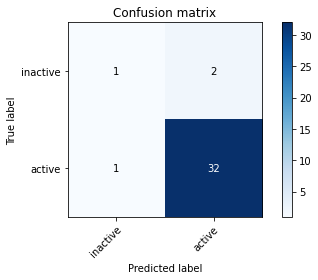

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(Y_true, Y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
 
    # Compute confusion matrix
    cm = confusion_matrix(Y_true, Y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, Y_pred, classes= df_2class['bioactivity_class'].unique(),
                      title='Confusion matrix')

plt.show()

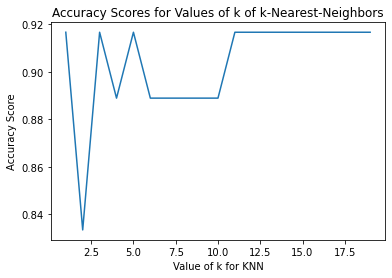

In [47]:
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, Y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [48]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

Text(0, 0.5, 'Frequency')

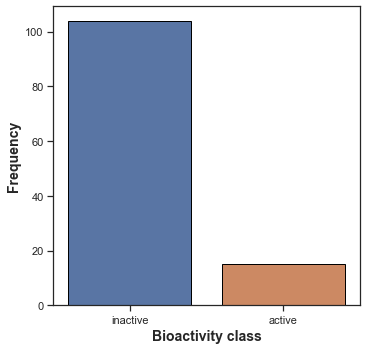

In [50]:
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

### **Scatter plot of MW versus LogP, NumHDonors and NumHAcceptors**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

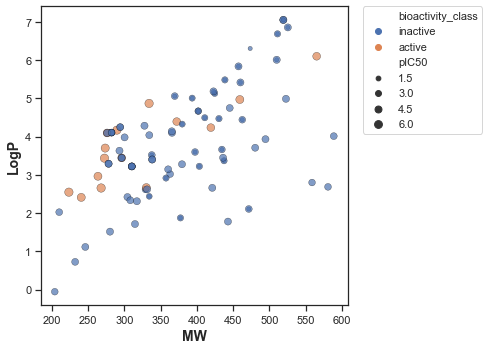

In [68]:
plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

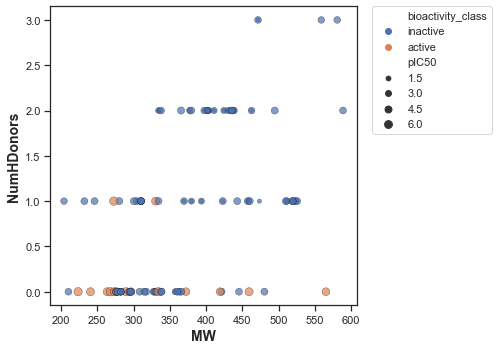

In [75]:
plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y='NumHDonors', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

The active compounds are of lower molecular weight and also have lesser number of hydrogen bond donors as seen in the above plot. This also aligns with the Lipinski rule of HBD < 5. 

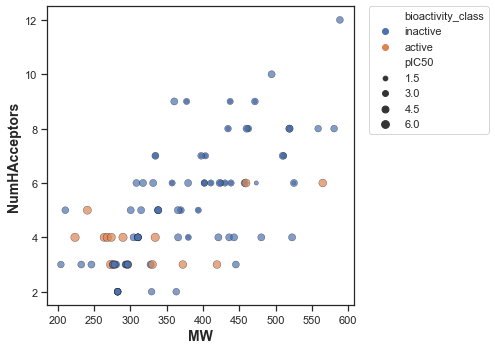

In [69]:
plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y='NumHAcceptors', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Similarly, the active compounds have lesser number of hydrogen bond acceptors as seen in the plot above. This also aligns with the Lipinski rule of HBA < 10.

### **Box plots**

#### **pIC50 value**

Text(0, 0.5, 'pIC50 value')

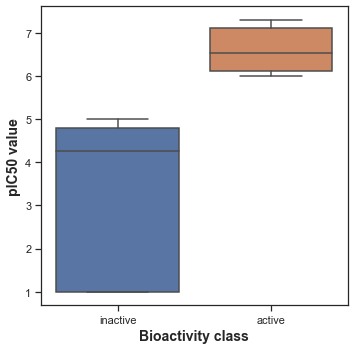

In [52]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

#### **Interpretation**

The difference in pIC50 values is expected as threshold values of IC50 were used to classify the compounds as active or inactive